In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
import scipy.optimize

from scipy import ndimage as ndi
from skimage import feature
from skimage import io

In [2]:
im = io.imread('../15-seconds.png',as_gray=True)

In [3]:
im.shape

(768, 1366)

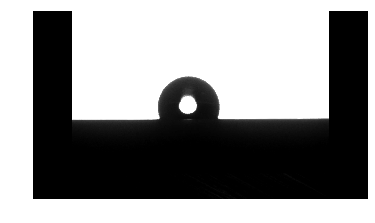

In [4]:
plt.imshow(im,cmap = 'gray',vmin = 0, vmax = 1)
plt.gca().axis('off');

(-0.5, 1365.5, 767.5, -0.5)

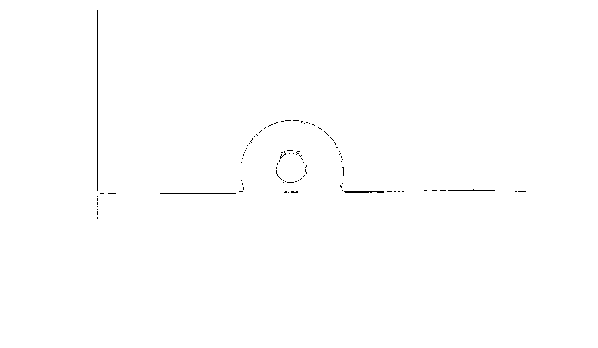

In [5]:
e1 = feature.canny(im,sigma = 0,low_threshold = 0.1, high_threshold = 0.5)
plt.figure(figsize=(10,10))
plt.imshow(e1,cmap = 'gray_r',vmin = 0, vmax = 1)
plt.gca().axis('off')

In [6]:
ind = np.array([[i,j] for j,row in enumerate(e1) for i,x in enumerate(row) if x])
crop = np.array([[x,y] for x,y in ind if (x >= 400 and x <= 800 and y >= 200 and y <= 600 )])

(600, 200)

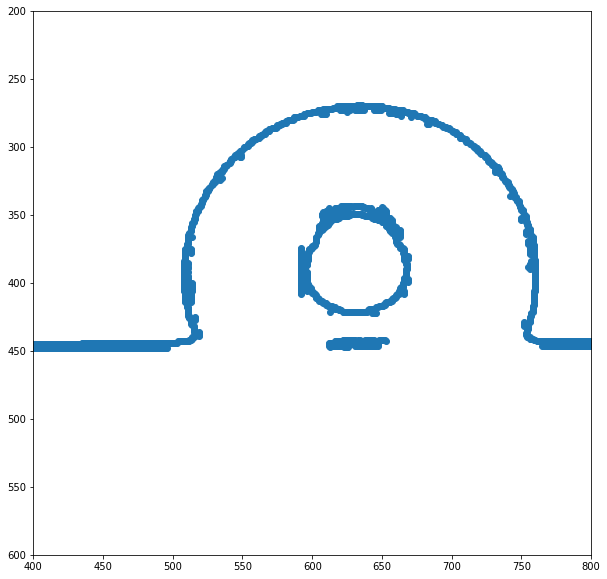

In [7]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(ind[:,0],ind[:,1])
plt.xlim([400,800])
plt.ylim([600,200])

In [8]:
baseline_l = np.array([[x,y] for x,y in ind if (x >= 400 and x <= 420 and y >= 200 and y <= 600 )])
baseline_r = np.array([[x,y] for x,y in ind if (x >= 780 and x <= 800 and y >= 200 and y <= 600 )])

In [9]:
A = np.ones((baseline_l.shape[0] + baseline_r.shape[0],2))
A[:,1] = np.concatenate((baseline_l[:,0],baseline_r[:,0]))
c = np.concatenate((baseline_l[:,1],baseline_r[:,1]))
thet = np.linalg.lstsq(A,c)[0]
thet

C:\Users\Mike Orella\Miniconda3\envs\images\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


array([ 4.48654691e+02, -5.25781754e-03])

(0, -400)

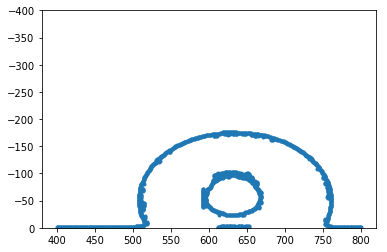

In [39]:
b,m = thet
plt.plot(crop[:,0],crop[:,1] - (m*crop[:,0]+b),'.')
plt.ylim([0,-400])

In [11]:
circ_points = np.array([(x,y) for x,y in crop if y - (m*x + b)  <= -5])

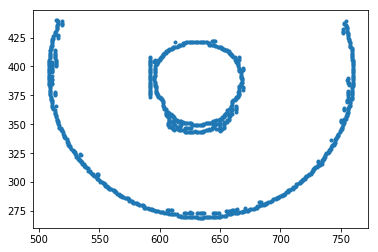

In [12]:
plt.plot(circ_points[:,0],circ_points[:,1],'.')

In [13]:
def dist(param,points):
    *z , r = param
    ar = [(np.linalg.norm(np.array(z) - np.array(point)) - r)**2 for point in points]
    return np.sum(ar)

In [14]:
res = sp.optimize.minimize(lambda x: dist(x,circ_points),np.concatenate((np.mean(circ_points, axis = 0),[200])))

In [15]:
theta = np.linspace(0,2*np.pi,num = 100)

In [16]:
*z, r = res['x']
x = z[0] + r * np.cos(theta)
y = z[1] + r * np.sin(theta)

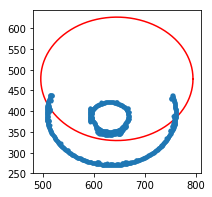

In [17]:
plt.figure(figsize = (3,3))
plt.plot(x,y,'r-')
plt.plot(circ_points[:,0],circ_points[:,1],'.')

In [19]:
np.sqrt(res['fun'])

1462.517504094391

In [20]:
circ_points.shape

(1100, 2)

In [21]:
new_points = np.array([(x,y) for x,y in circ_points if (x - z[0])**2 + (y-z[1])**2 >= r**2])

(250, 500)

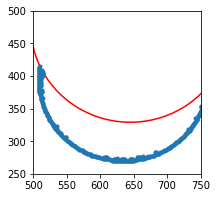

In [22]:
plt.figure(figsize = (3,3))
plt.plot(x,y,'r-')
plt.plot(new_points[:,0],new_points[:,1],'.')
plt.xlim([500,750])
plt.ylim([250,500])

In [23]:
res = sp.optimize.minimize(lambda x: dist(x,new_points),np.concatenate((np.mean(new_points, axis = 0),[100])))
res

      fun: 959.4608129450012
 hess_inv: array([[ 1.19576104e-04, -7.48235968e-05,  1.18435658e-04],
       [-7.48235968e-05,  1.12569125e-03,  3.39789198e-04],
       [ 1.18435658e-04,  3.39789198e-04,  9.73959079e-04]])
      jac: array([8.39233398e-05, 7.62939453e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 121
      nit: 16
     njev: 24
   status: 2
  success: False
        x: array([634.3423591 , 395.38022034, 125.49737104])

In [24]:
*z, r = res['x']
x = z[0] + r * np.cos(theta)
y = z[1] + r * np.sin(theta)

(250, 530)

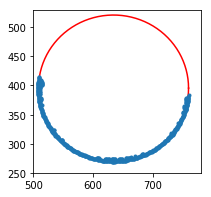

In [25]:
plt.figure(figsize = (3,3))
plt.plot(x,y,'r-')
plt.plot(new_points[:,0],new_points[:,1],'.')
plt.xlim([500,780])
plt.ylim([250,530])

In [27]:
np.sqrt(res['fun'])

30.975164453881455

In [30]:
x = new_points

In [31]:
x[0:2,:]

array([[632, 269],
       [633, 269]])

In [32]:
x[0,0] = 100
new_points[0:2,:]

array([[100, 269],
       [633, 269]])

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im,cmap = 'gray',vmin = 0, vmax = 1)
plt.gca().axis('off');
plt.plot(x,y,'r-')

plt.plot([0,1366],[b,m*1366+b],'r-')
plt.xlim([500,780])
plt.ylim([530,250])

In [ ]:
im = io.imread('../45-seconds.png',as_gray=True)

In [ ]:
im.shape

In [ ]:
plt.imshow(im,cmap = 'gray',vmin = 0, vmax = 1)
plt.gca().axis('off');

In [ ]:
e1 = feature.canny(im,sigma = 0,low_threshold = 0.1, high_threshold = 0.5)
plt.figure(figsize=(10,10))
plt.imshow(e1,cmap = 'gray_r',vmin = 0, vmax = 1)
plt.gca().axis('off')

In [ ]:
ind = np.array([[i,j] for j,row in enumerate(e1) for i,x in enumerate(row) if x])
crop = np.array([[x,y] for x,y in ind if (x >= 400 and x <= 1000 and y >= 500 and y <= 800 )])

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(ind[:,0],ind[:,1])
plt.xlim([400,1000])
plt.ylim([800,500])

In [ ]:
baseline_l = np.array([[x,y] for x,y in ind if (x >= 400 and x <= 420 and y >= 500 and y <= 800 )])
baseline_r = np.array([[x,y] for x,y in ind if (x >= 980 and x <= 1000 and y >= 500 and y <= 800 )])

In [ ]:
A = np.ones((baseline_l.shape[0] + baseline_r.shape[0],2))
A[:,1] = np.concatenate((baseline_l[:,0],baseline_r[:,0]))
c = np.concatenate((baseline_l[:,1],baseline_r[:,1]))
thet = np.linalg.lstsq(A,c)[0]
thet

In [ ]:
b,m = thet
plt.plot(crop[:,0],crop[:,1] - (m*crop[:,0]+b),'.')
plt.ylim([0,-50])

In [ ]:
circ_points = np.array([(x,y) for x,y in crop if y - (m*x + b)  <= -5])

In [ ]:
plt.plot(circ_points[:,0],circ_points[:,1],'.')

In [ ]:
res = sp.optimize.minimize(lambda x: dist(x,circ_points),np.concatenate((np.mean(circ_points, axis = 0),[200])))

In [ ]:
*z, r = res['x']
x = z[0] + r * np.cos(theta)
y = z[1] + r * np.sin(theta)

In [ ]:
plt.figure(figsize = (3,3))
plt.plot(x,y,'r-')
plt.plot(circ_points[:,0],circ_points[:,1],'.')

In [ ]:
plt.imshow(im,cmap = 'gray',vmin = 0, vmax = 1)
plt.gca().axis('off');
plt.plot(x,y,'r-')

plt.plot([0,1366],[b,m*1366+b],'r-')

In [38]:
res = []
res[0] = 1
res[1] = 1

IndexError: list assignment index out of range

In [37]:
print(res)

TypeError: object of type 'int' has no len()